In [1]:
from tqdm import tqdm  # Importing tqdm module

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import expit
from scipy.io import loadmat
import shap
import seaborn as sns

In [3]:

def Actor_NL_gamma_bah(X):
    X=X.T

    # Activity function for value function
    Neuron_Num_a = 20
    op = v_actor.T@ X
    DS = np.where(op >= 0, 
              1 / (1 + np.exp(-op)), 
              np.exp(op) / (1 + np.exp(op)))

    return DS


def model_(X):
    u = W_actor.T @ Actor_NL_gamma_bah(X)
    return np.array(u).reshape(-1,2)

In [4]:
mat_data = loadmat('with_safety3.mat')
Wa = mat_data['W_actor']
v_actor = mat_data['Va']
df = mat_data['X'].T
y = mat_data['u']
print(y)

[[1.65300000e+04 2.23421089e+03 3.04153352e+01 ... 1.20881518e+03
  1.20881200e+03 1.20880884e+03]
 [2.11670000e+05 2.21200984e+04 9.38368307e+03 ... 9.17218707e+02
  9.17213501e+02 9.17208375e+02]]


In [5]:
y.shape

(2, 3000)

In [6]:
mat_data.clear()
W_actor = Wa[:,:,-1]
X = pd.DataFrame(np.array(df), columns=['u', 'v', 'r', 'x', 'y', r'$\psi$', 'ud', 'vd', 'bias'])
y = pd.DataFrame(np.array(y).reshape(-1, 2), columns=[r'$\tau_x$', r'$\tau_{\psi}$'])
X.head()

,u,v,r,x,y,$\psi$,ud,vd,bias
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
1,-1.000000,-1.000000,0.000000,-1.879801,-1.519799,-0.994958,87.980134,51.979867,1.0
2,-0.875439,-0.936173,0.104205,-1.754993,-1.475719,-0.933575,-0.024681,1.974686,1.0
3,-0.874334,-0.904991,0.147727,-1.752881,-1.462627,-0.930251,-0.100781,1.809045,1.0
4,-0.873905,-0.875565,0.188624,-1.751616,-1.450505,-0.928562,-0.083609,1.730479,1.0


In [7]:
background_data = shap.utils.sample(X, nsamples=100 ,random_state=0)
background_data.head()


,u,v,r,x,y,$\psi$,ud,vd,bias
311,0.311091,-0.842988,1.712356,-0.691221,-0.112875,-0.722467,-0.211372,-0.441869,1.0
1025,0.781165,-0.558470,0.890721,-0.261496,0.013569,-0.528117,0.054350,0.081412,1.0
1587,0.778615,-0.545727,0.991962,-0.281089,0.006323,-0.462497,-0.003382,0.006348,1.0
2942,0.778145,-0.562167,1.001027,-0.241824,0.002081,-0.399282,-0.001136,0.000049,1.0
2981,0.778335,-0.562194,1.000908,-0.241207,0.002021,-0.398253,-0.001053,0.000119,1.0


In [8]:
#model_(background_data)

In [9]:
background_data.shape

(100, 9)

In [10]:
# Create a SHAP explainer
explainer = shap.KernelExplainer(model_,background_data)
explainer

In [11]:
# Compute SHAP values
shap_ = explainer.shap_values(X)

  0%|          | 0/3001 [00:00<?, ?it/s]

C:\Users\bfg2h\AppData\Local\Temp\ipykernel_21752\1307586157.py:8: RuntimeWarning: overflow encountered in exp
  1 / (1 + np.exp(-op)),
C:\Users\bfg2h\AppData\Local\Temp\ipykernel_21752\1307586157.py:9: RuntimeWarning: overflow encountered in exp
  np.exp(op) / (1 + np.exp(op)))
C:\Users\bfg2h\AppData\Local\Temp\ipykernel_21752\1307586157.py:9: RuntimeWarning: invalid value encountered in divide
  np.exp(op) / (1 + np.exp(op)))


In [12]:
shap_values=shap_

In [13]:
X.iloc[1000,:]

u         0.760374
v        -0.579437
r         0.882714
x        -0.266336
y         0.013666
$\psi$   -0.532288
ud        0.073284
vd        0.085785
bias      1.000000
Name: 1000, dtype: float64

In [14]:
shap_values.shape

(3001, 9, 2)

In [15]:
X.iloc[200,:]

u         0.152513
v        -0.419343
r         1.999929
x        -1.020360
y        -0.296533
$\psi$   -0.779241
ud       -0.112238
vd       -0.538522
bias      1.000000
Name: 200, dtype: float64

In [16]:
print(shap_values.shape)
print(X.iloc[2000, :].shape)

(3001, 9, 2)
(9,)


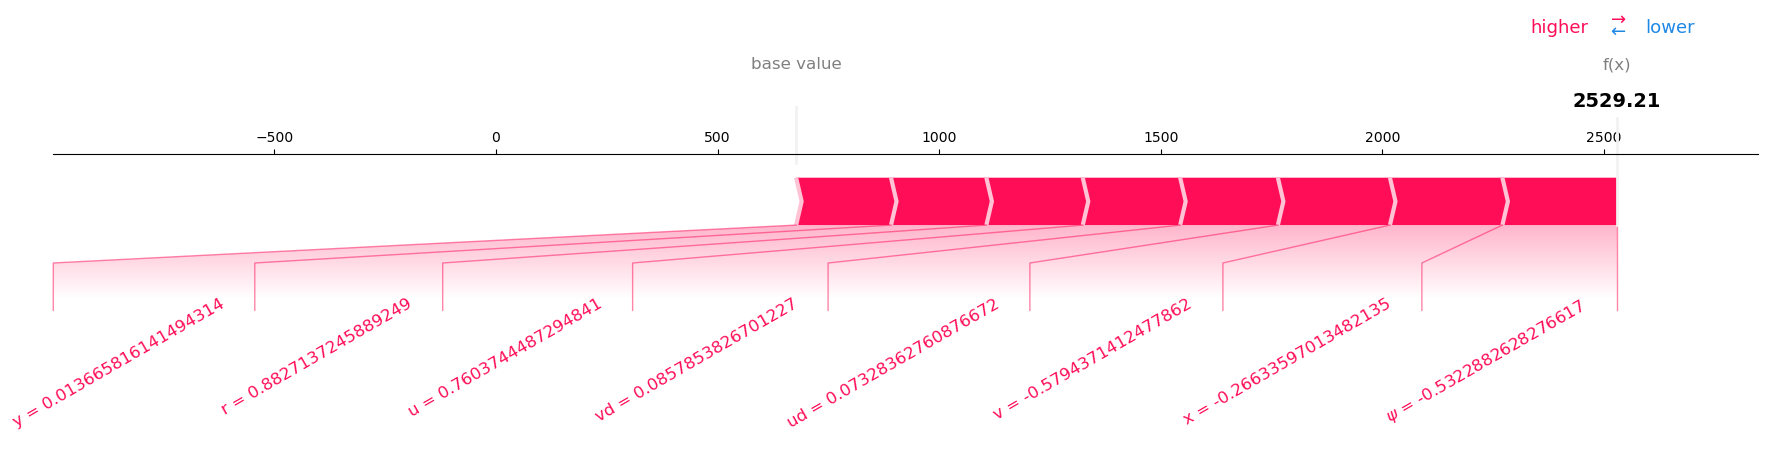

In [17]:
shap.force_plot(
    explainer.expected_value[0],  # Base value for the selected output
    shap_values[1000, :, 0],      # SHAP values for the first output
    X.iloc[1000, :],       # Features as a 1D array
    matplotlib=True,
    figsize=(22, 4),
    text_rotation=30
)

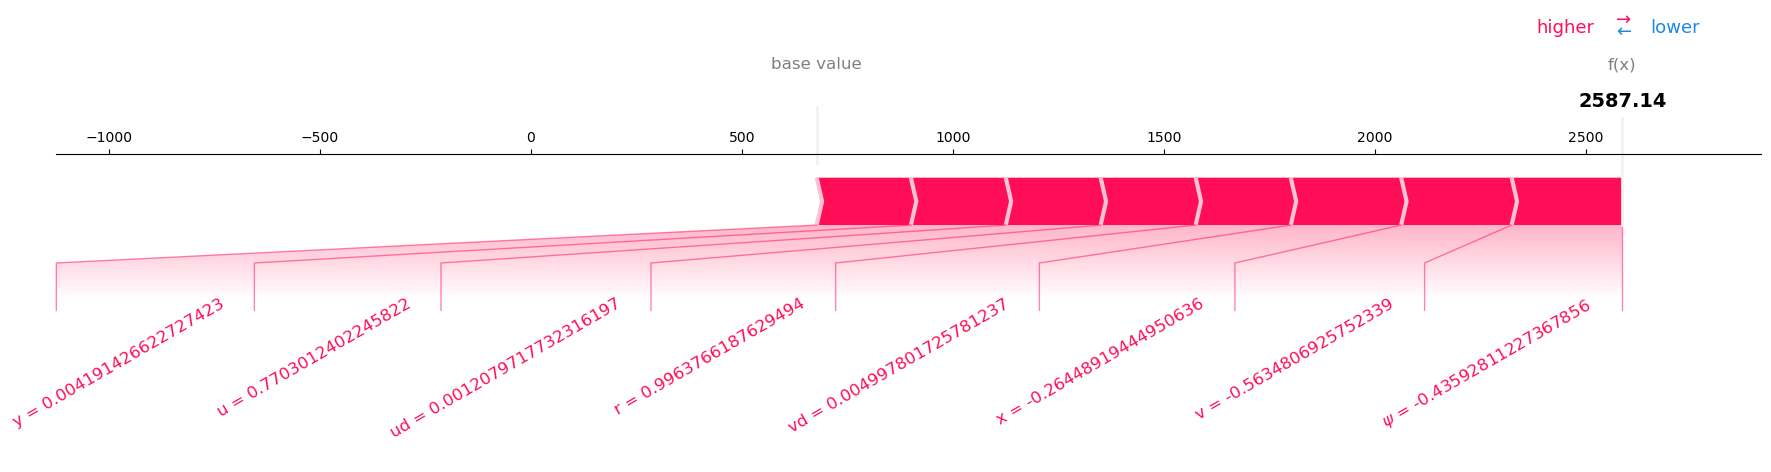

In [18]:
shap.initjs()
plt.style.use("_classic_test_patch")
shap.force_plot(explainer.expected_value[0], shap_values[2000,:,0], X.iloc[2000,:], matplotlib=True, figsize = (22,4), text_rotation=30)
#plt.savefig('force.png')

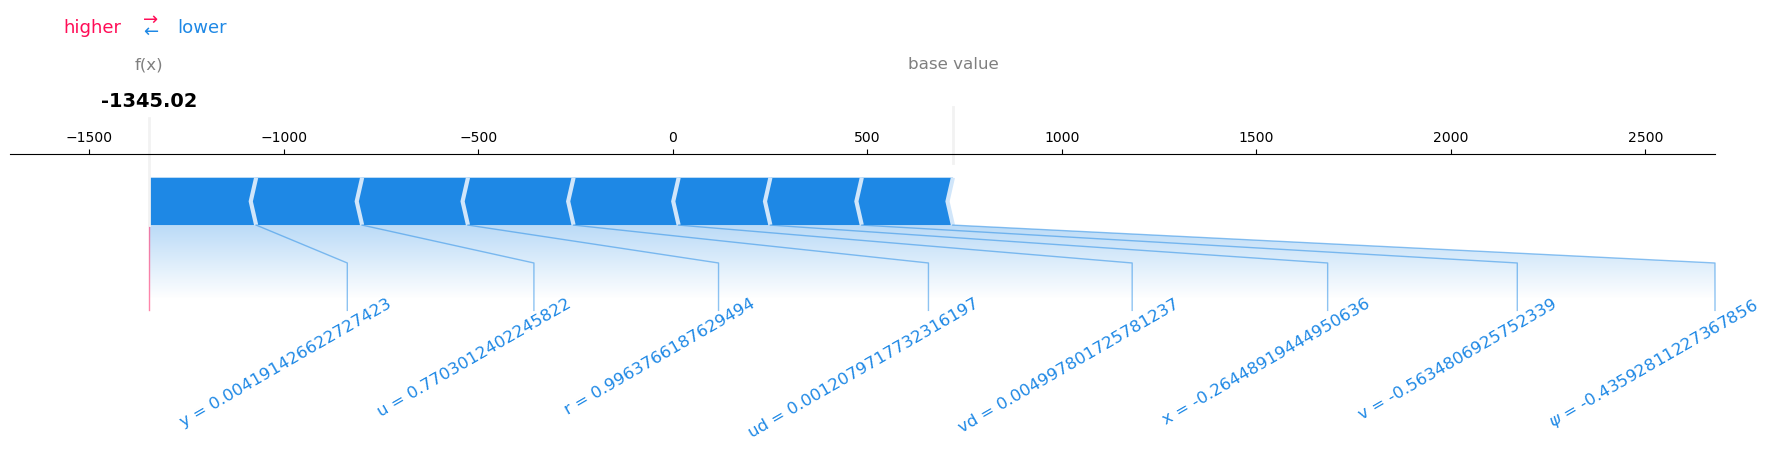

In [19]:
shap.initjs()
plt.style.use("_classic_test_patch")
shap.force_plot(explainer.expected_value[1], shap_values[2000,:,1], X.iloc[2000,:], matplotlib=True, figsize = (22,4), text_rotation=30)
#plt.savefig('force.png')

In [20]:
aggregated_shap_values = shap_values.mean(axis=2)
feature_importance = aggregated_shap_values.mean(axis=0)  # Shape becomes (9,)
feature_names = ['u', 'v', 'r', 'x', 'y', r'$\psi$', 'ud', 'vd', 'bias']  # Replace with your actual feature names
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'shap_vals': feature_importance
})
feature_importance_df.sort_values(by='shap_vals', ascending=False, inplace=True)
print(feature_importance_df)

  feature  shap_vals
1       v  24.793694
3       x  24.054667
5  $\psi$  23.617936
8    bias   0.000000
4       y -12.184829
2       r -12.292122
7      vd -12.633996
6      ud -12.892427
0       u -13.022538


In [21]:
shap_values.shape

(3001, 9, 2)

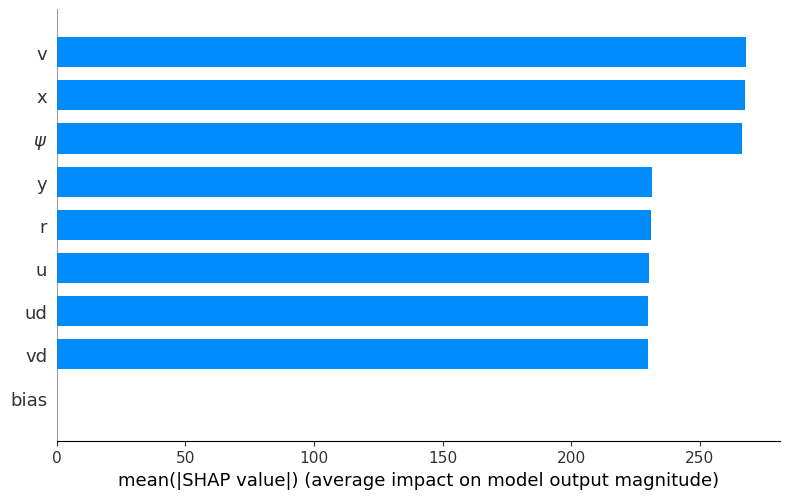

In [22]:
shap.summary_plot(shap_values[:,:,0],X,plot_type = "bar")
#plt.savefig('summery_bar.png')

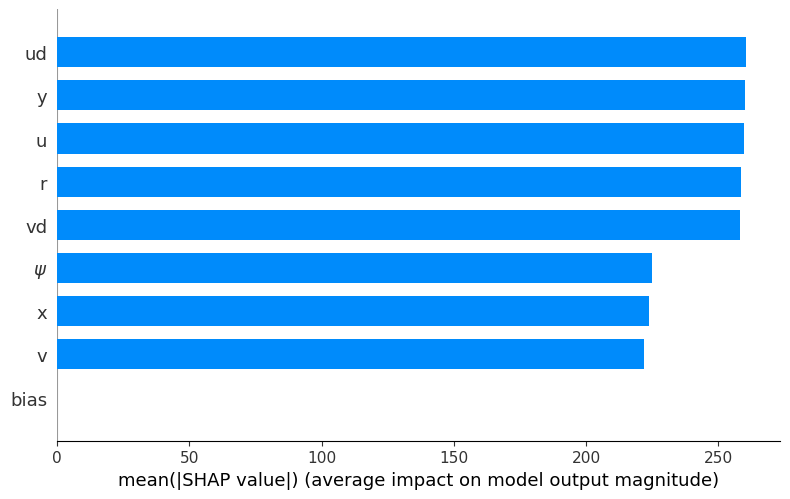

In [23]:
shap.summary_plot(shap_values[:,:,1],X,plot_type = "bar")
#plt.savefig('summery_bar.png')

In [38]:
# Update font size globally
plt.rcParams.update({'font.size': 16})

# Create the SHAP bar plot
plt.figure()  # Create a new figure
shap.summary_plot(shap_values[:, :, 0], X, plot_type="bar", show=False)  # Disable auto-display

# Modify x-axis label
plt.xlabel(r"mean(|SHAP value|) (average impact on model control input $\tau_x$)")
# Save the plot with the updated x-axis label
plt.savefig('summary_bar1.png', dpi=300, bbox_inches="tight")  # Save the figure
plt.close()  # Close the figure

In [41]:
plt.rcParams.update({'font.size': 16})
plt.figure()  # Create a new figure
shap.summary_plot(shap_values[:, :, 1], X, plot_type="bar", show=False)  # Disable auto-display

# Modify x-axis label with properly closed LaTeX math
plt.xlabel(r"mean(|SHAP value|) (average impact on model control input $\tau_{\psi}$)")

# Save the plot with the updated x-axis label
plt.savefig('summary_bar2.png', dpi=300, bbox_inches="tight")  # Save the figure
plt.close()  # Close the figure to avoid overlapping plots


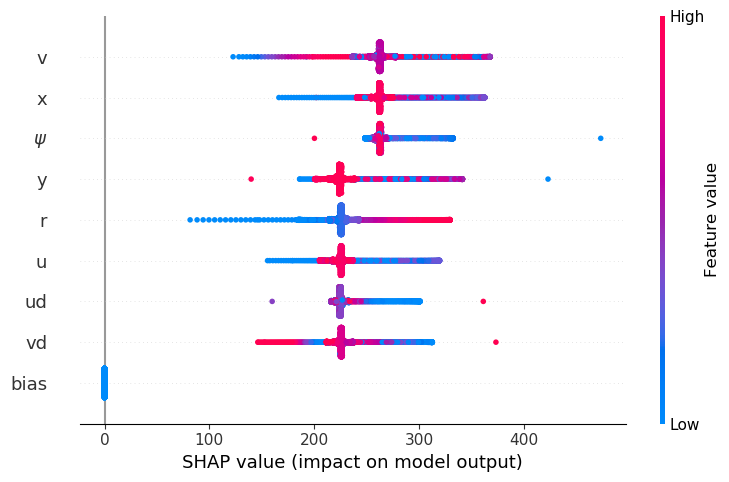

In [26]:
shap.summary_plot(shap_values[:,:,0],X)
#plt.savefig('summery.png')

In [27]:
# Generate and save SHAP summary plot
plt.figure()  # Create a new figure
shap.summary_plot(shap_values[:, :, 0], X, show=False)  # Disable auto-showing of the plot
plt.savefig("shap_summary_plot.png", dpi=300, bbox_inches="tight")  # Save the plot
plt.close()  

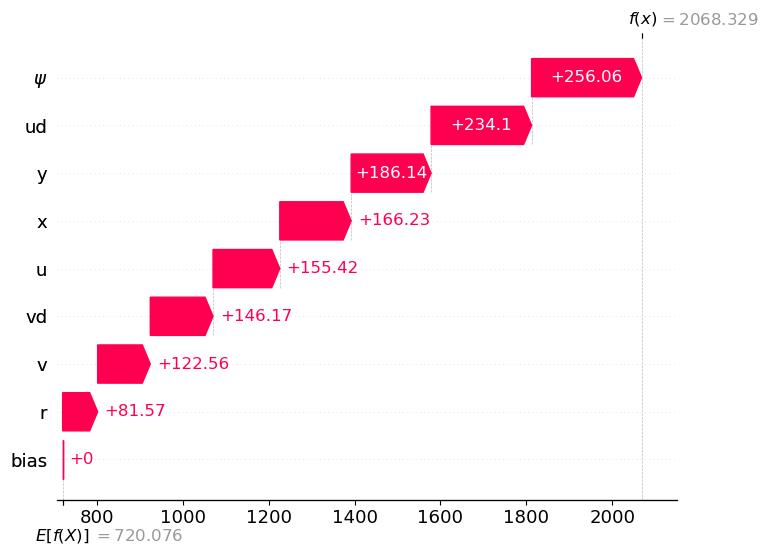

In [28]:
shap.plots._waterfall.waterfall_legacy(
    explainer.expected_value[1],            # Expected value for the second output
    shap_values[2, :, 0],                # SHAP values for sample 2000, output 1
    feature_names=feature_names             # List of feature names
)


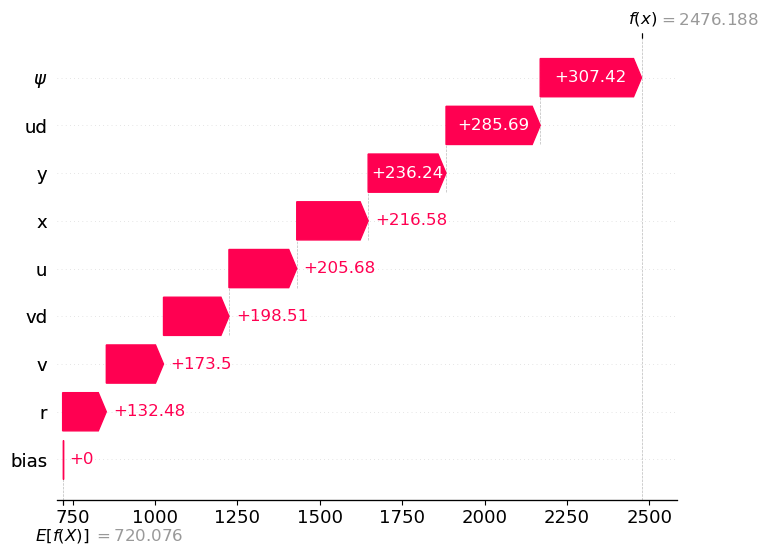

In [29]:
shap.plots._waterfall.waterfall_legacy(
    explainer.expected_value[1],            # Expected value for the second output
    shap_values[2, :, 1],                # SHAP values for sample 2000, output 1
    feature_names=feature_names             # List of feature names
)


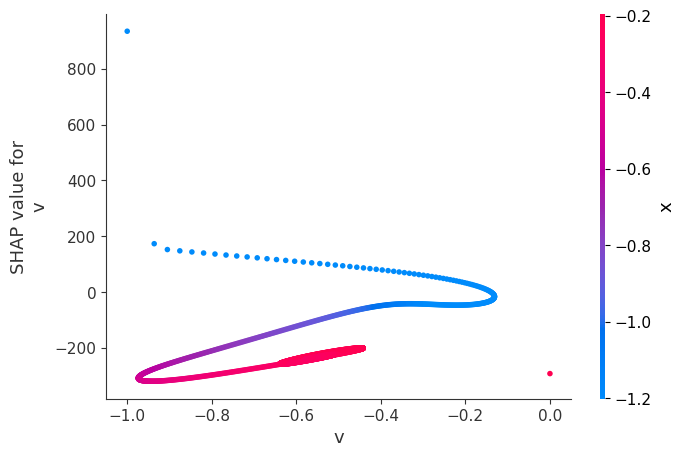

In [30]:
shap.dependence_plot(1, shap_values[:, :, 1], X)
#plt.savefig('dependence.png')

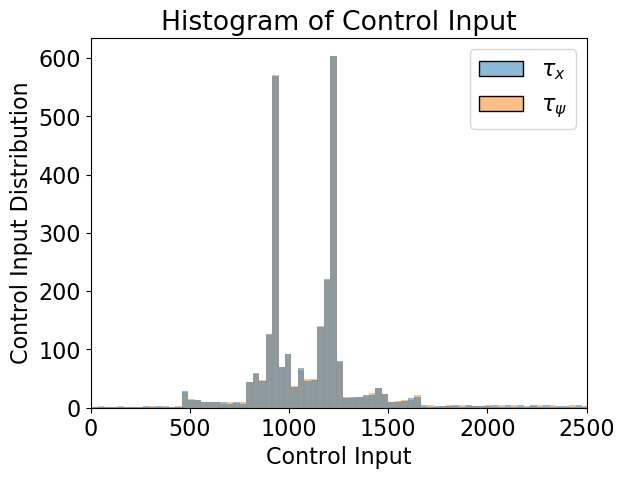

In [31]:
sns.histplot(y, kde=False)  # Histogram without KDE
plt.ylabel('Control Input Distribution')
plt.xlabel('Control Input')
plt.xlim(0,2500)
plt.title('Histogram of Control Input')
plt.savefig('histogram.png', dpi=300, bbox_inches='tight')
plt.show()


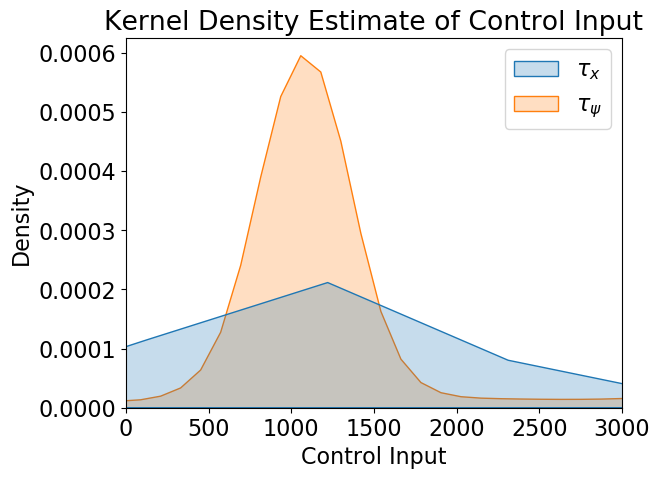

In [32]:
sns.kdeplot(y, fill=True)  # KDE with filled area
plt.xlim(0, 3000)
plt.ylabel('Density')
plt.xlabel('Control Input')
plt.title('Kernel Density Estimate of Control Input')
plt.savefig('Kernel_Density_Estimate.png', dpi=300, bbox_inches='tight')
plt.show()

<Axes: >

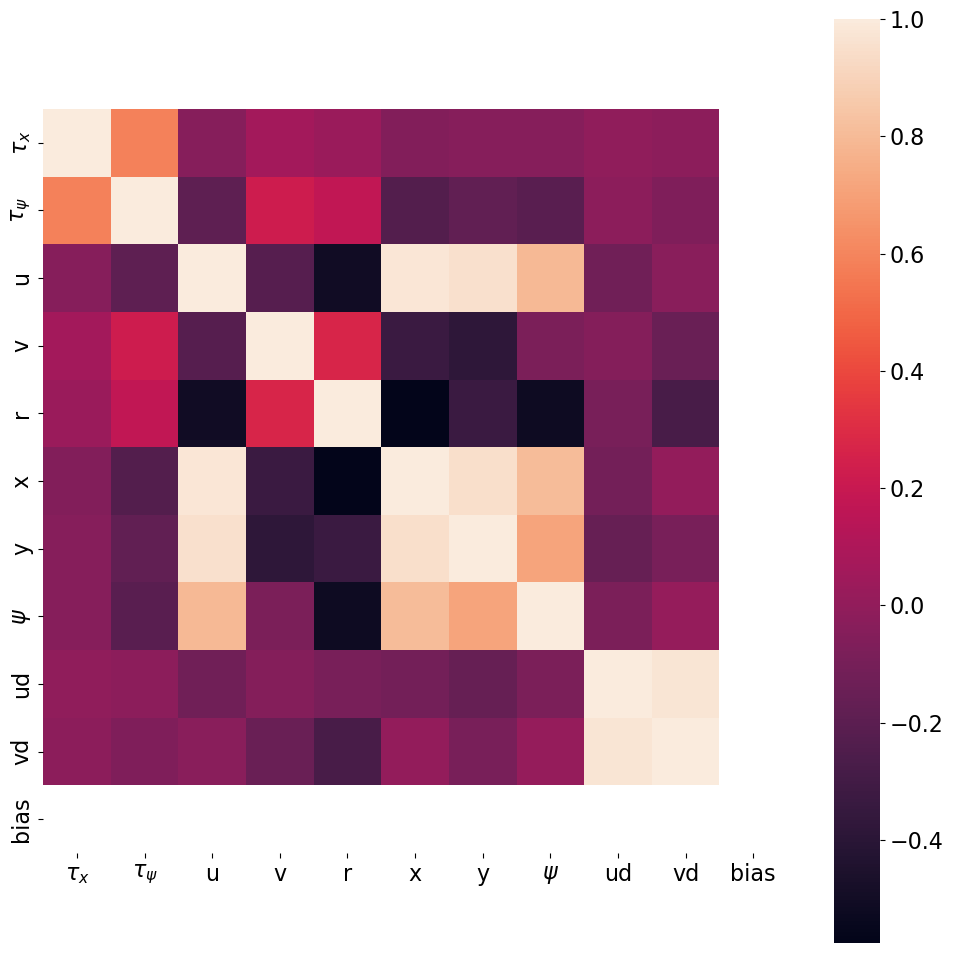

In [33]:
corrmat = pd.concat([y,X],axis = 1).corr()
f,ax=plt.subplots(figsize=(12,12))
sns.heatmap(corrmat, xticklabels=corrmat.columns.values,
            yticklabels=corrmat.columns.values,square=True)
#plt.savefig('Corr.png')

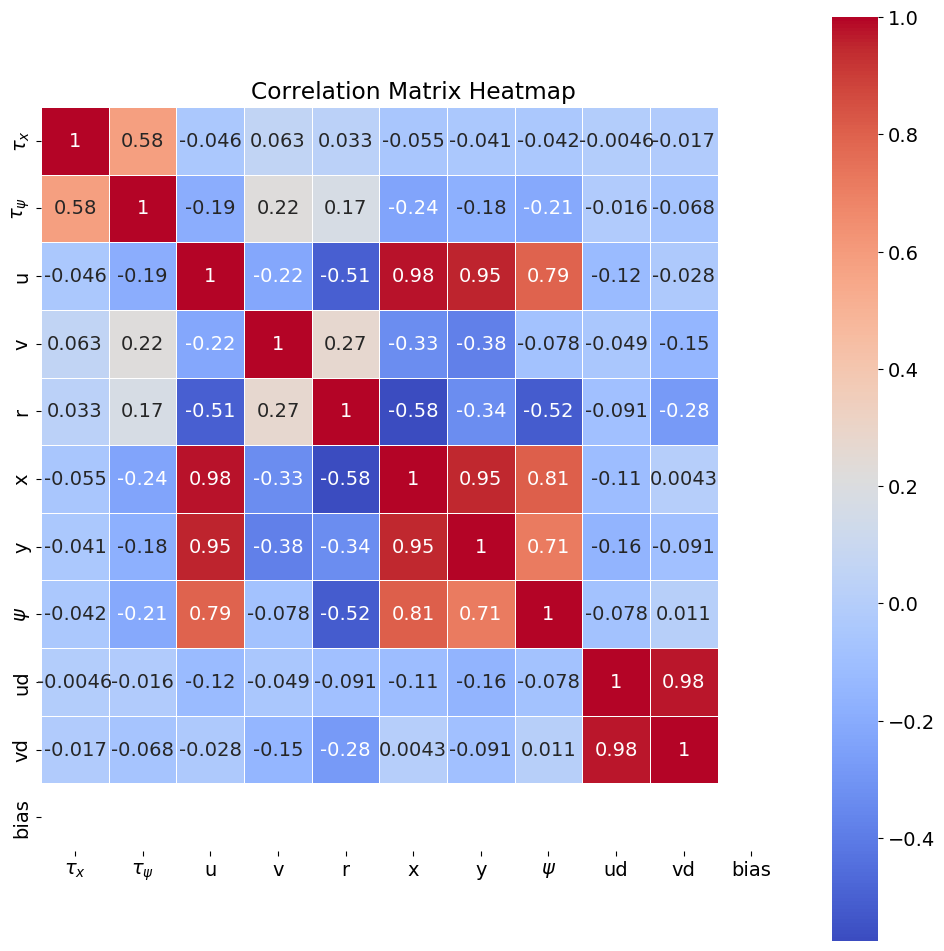

In [34]:
plt.rcParams.update({'font.size': 14})
corrmat = pd.concat([y, X], axis=1).corr()

# Create the heatmap
f, ax = plt.subplots(figsize=(12, 12))  # Set figure size
sns.heatmap(
    corrmat,
    xticklabels=corrmat.columns.values,
    yticklabels=corrmat.columns.values,
    square=True,
    annot=True,       # Add values in the cells
    cmap="coolwarm",  # Color map
    linewidths=0.5    # Grid lines between cells
)

# Add title
plt.title("Correlation Matrix Heatmap")

# Save the figure
plt.savefig("correlation_heatmap.png", dpi=300, bbox_inches="tight")  # Adjust DPI and bounds
plt.show()

In [35]:
# Compute SHAP values
# Create a SHAP explainer
explainer = shap.KernelExplainer(model_,background_data)
explainer
start=1
end =2999
shap_ = explainer.shap_values(X[start:end])
X[start:end]

  0%|          | 0/2998 [00:00<?, ?it/s]

C:\Users\bfg2h\AppData\Local\Temp\ipykernel_21752\1307586157.py:8: RuntimeWarning: overflow encountered in exp
  1 / (1 + np.exp(-op)),
C:\Users\bfg2h\AppData\Local\Temp\ipykernel_21752\1307586157.py:9: RuntimeWarning: overflow encountered in exp
  np.exp(op) / (1 + np.exp(op)))
C:\Users\bfg2h\AppData\Local\Temp\ipykernel_21752\1307586157.py:9: RuntimeWarning: invalid value encountered in divide
  np.exp(op) / (1 + np.exp(op)))


,u,v,r,x,y,$\psi$,ud,vd,bias
1,-1.000000,-1.000000,0.000000,-1.879801,-1.519799,-0.994958,87.980134,51.979867,1.0
2,-0.875439,-0.936173,0.104205,-1.754993,-1.475719,-0.933575,-0.024681,1.974686,1.0
3,-0.874334,-0.904991,0.147727,-1.752881,-1.462627,-0.930251,-0.100781,1.809045,1.0
4,-0.873905,-0.875565,0.188624,-1.751616,-1.450505,-0.928562,-0.083609,1.730479,1.0
5,-0.873222,-0.847015,0.228528,-1.750278,-1.438520,-0.926942,-0.065442,1.656399,1.0
...,...,...,...,...,...,...,...,...,...
2994,0.778401,-0.562197,1.000874,-0.241006,0.002001,-0.397917,-0.001030,0.000138,1.0
2995,0.778406,-0.562197,1.000871,-0.240991,0.002000,-0.397892,-0.001029,0.000139,1.0
2996,0.778411,-0.562197,1.000869,-0.240975,0.001998,-0.397866,-0.001027,0.000141,1.0
2997,0.778417,-0.562197,1.000866,-0.240960,0.001997,-0.397840,-0.001025,0.000142,1.0


In [36]:
shap_values=shap_
shap_values

array([[[ 309.65246417, 1051.00962676],
        [ 192.43408108,  934.36100544],
        [ 145.88912783,  888.60391246],
        ...,
        [ 361.18184052, 1102.77938373],
        [ 373.2217852 , 1116.42491275],
        [   0.        ,    0.        ]],

       [[ 155.42281089,  205.67622946],
        [ 122.55766708,  173.50008191],
        [  81.57465354,  132.47993143],
        ...,
        [ 234.09822934,  285.69470091],
        [ 146.16562864,  198.51457076],
        [   0.        ,    0.        ]],

       [[ 157.54367987,  181.35368416],
        [ 128.10766368,  152.55749578],
        [  88.22403997,  112.63493131],
        ...,
        [ 230.91505291,  256.03213271],
        [ 146.52980785,  172.40126559],
        [   0.        ,    0.        ]],

       ...,

       [[ 225.20714204, -272.23404393],
        [ 262.35190817, -234.71742604],
        [ 225.71252852, -271.80646599],
        ...,
        [ 225.24770203, -271.37294265],
        [ 225.73789547, -270.11268262],
        [

In [37]:
# shap.initjs()
# plt.style.use("_classic_test_patch")
# shap.force_plot(explainer.expected_value[0], shap_values, X[start:end], figsize = (22,4), text_rotation=30)
# #plt.savefig('water_fall.png')